In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
Census = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
Census.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
Census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
Census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
Census.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
Census.shape

(32560, 15)

In [7]:
Census.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


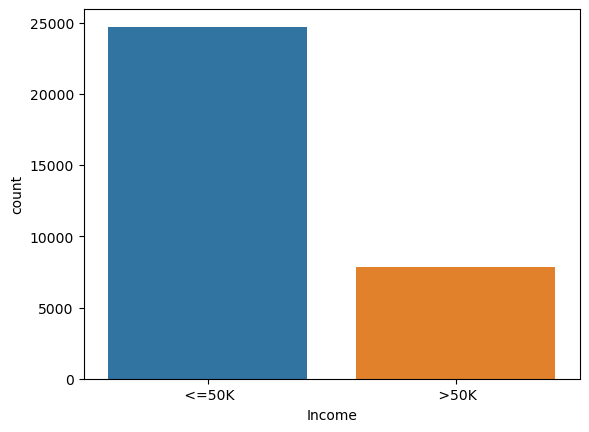

In [8]:
ax = sns.countplot(x='Income', data=Census)
print(Census['Income'].value_counts())

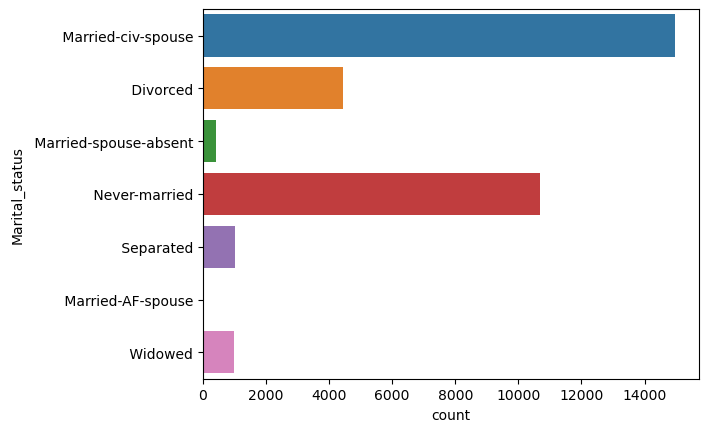

In [9]:
ax = sns.countplot(y='Marital_status', data=Census)
plt.show()

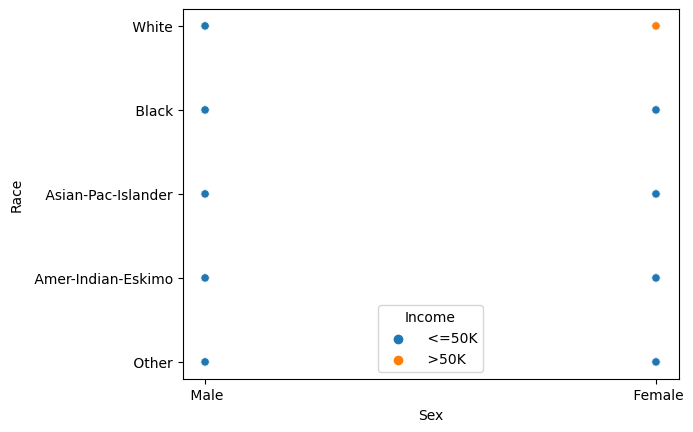

In [10]:
ax = sns.scatterplot(x= 'Sex', y='Race', data=Census, hue ='Income')
plt.show()

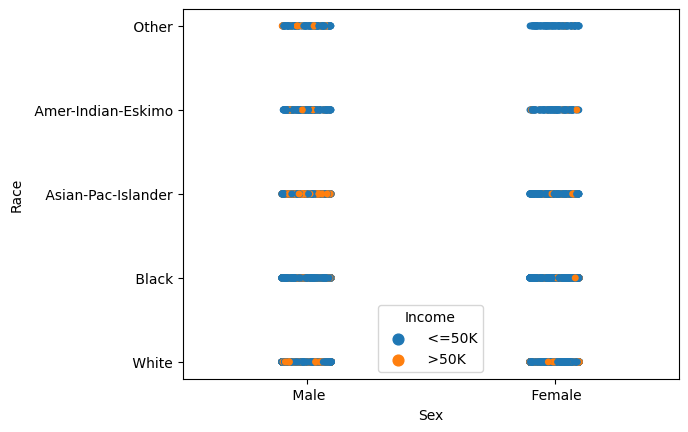

In [11]:
ax = sns.stripplot(x= 'Sex', y='Race', data=Census, hue ='Income')
plt.show()

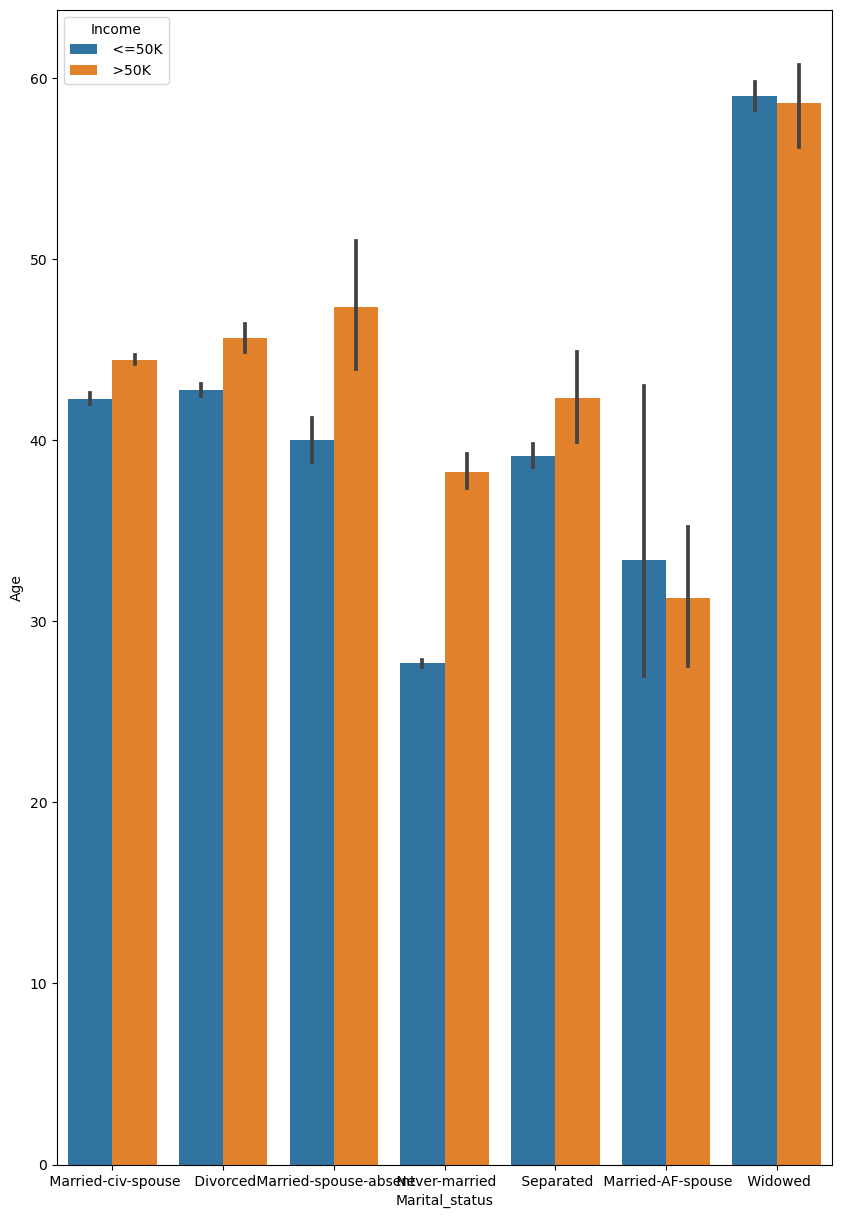

In [12]:
plt.figure(figsize=(10,15))
sns.barplot(x= 'Marital_status', y='Age', data=Census, hue ='Income')
plt.show()

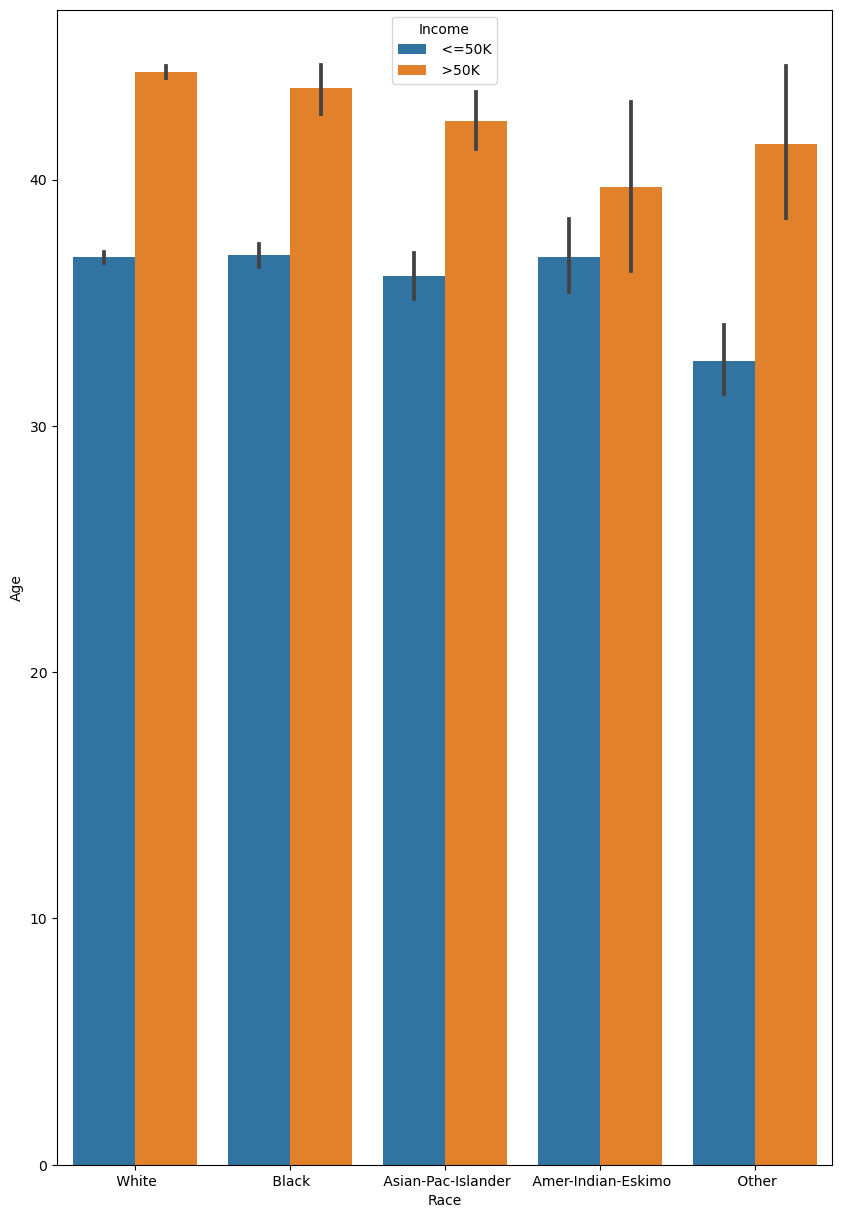

In [13]:
plt.figure(figsize=(10,15))
sns.barplot(x= 'Race', y='Age', data=Census, hue ='Income')
plt.show()

<Figure size 800x1200 with 0 Axes>

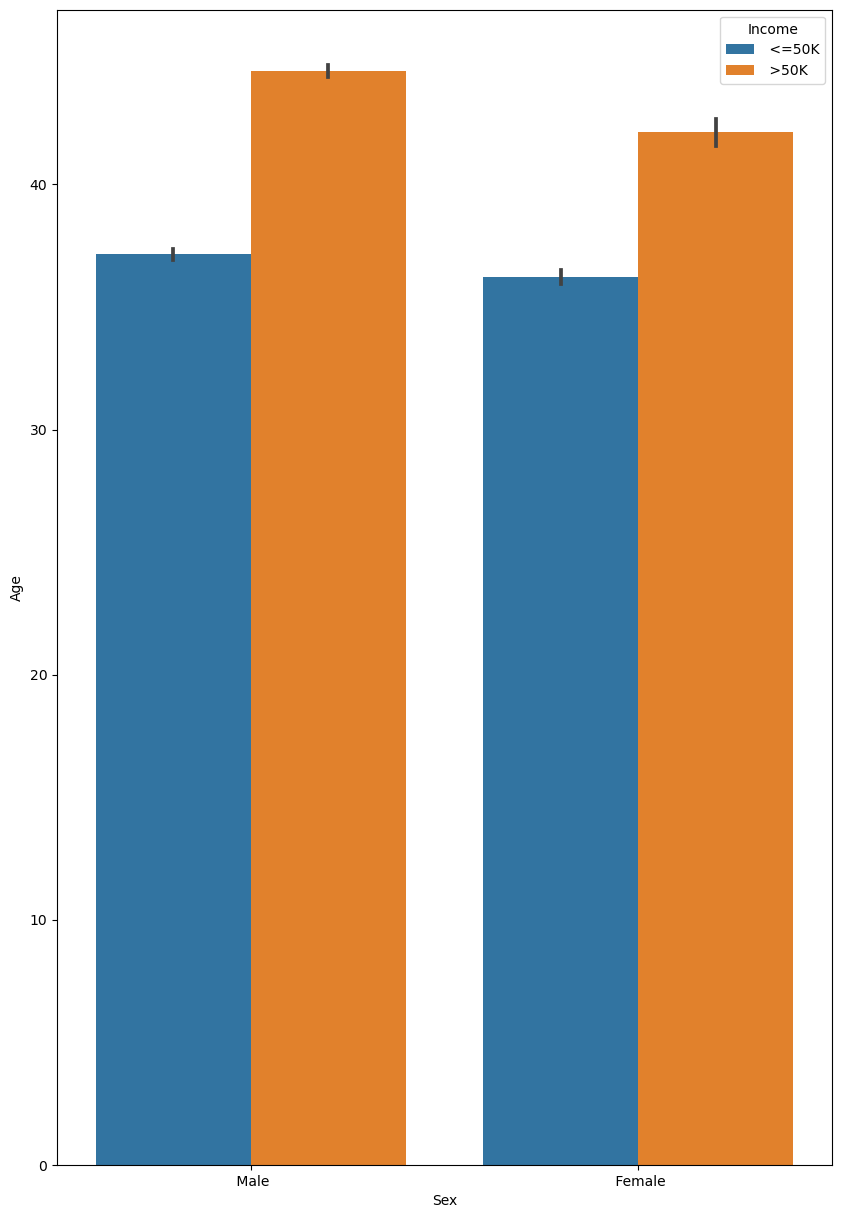

In [14]:
plt.figure(figsize=(8,12))
plt.figure(figsize=(10,15))
sns.barplot(x= 'Sex', y='Age', data=Census, hue ='Income')
plt.show()

<AxesSubplot:>

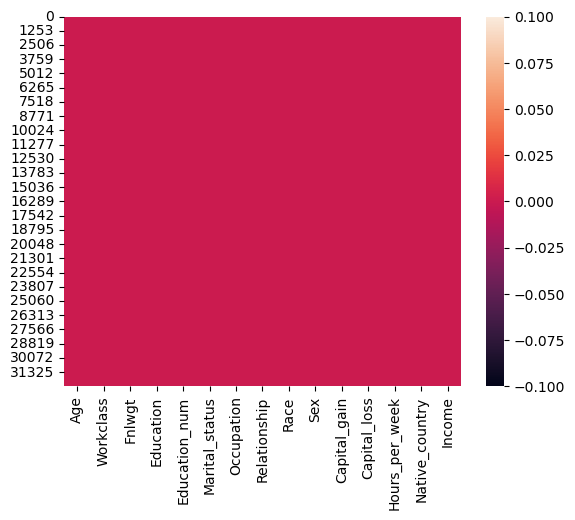

In [15]:
sns.heatmap(Census.isnull())

In [16]:
Census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


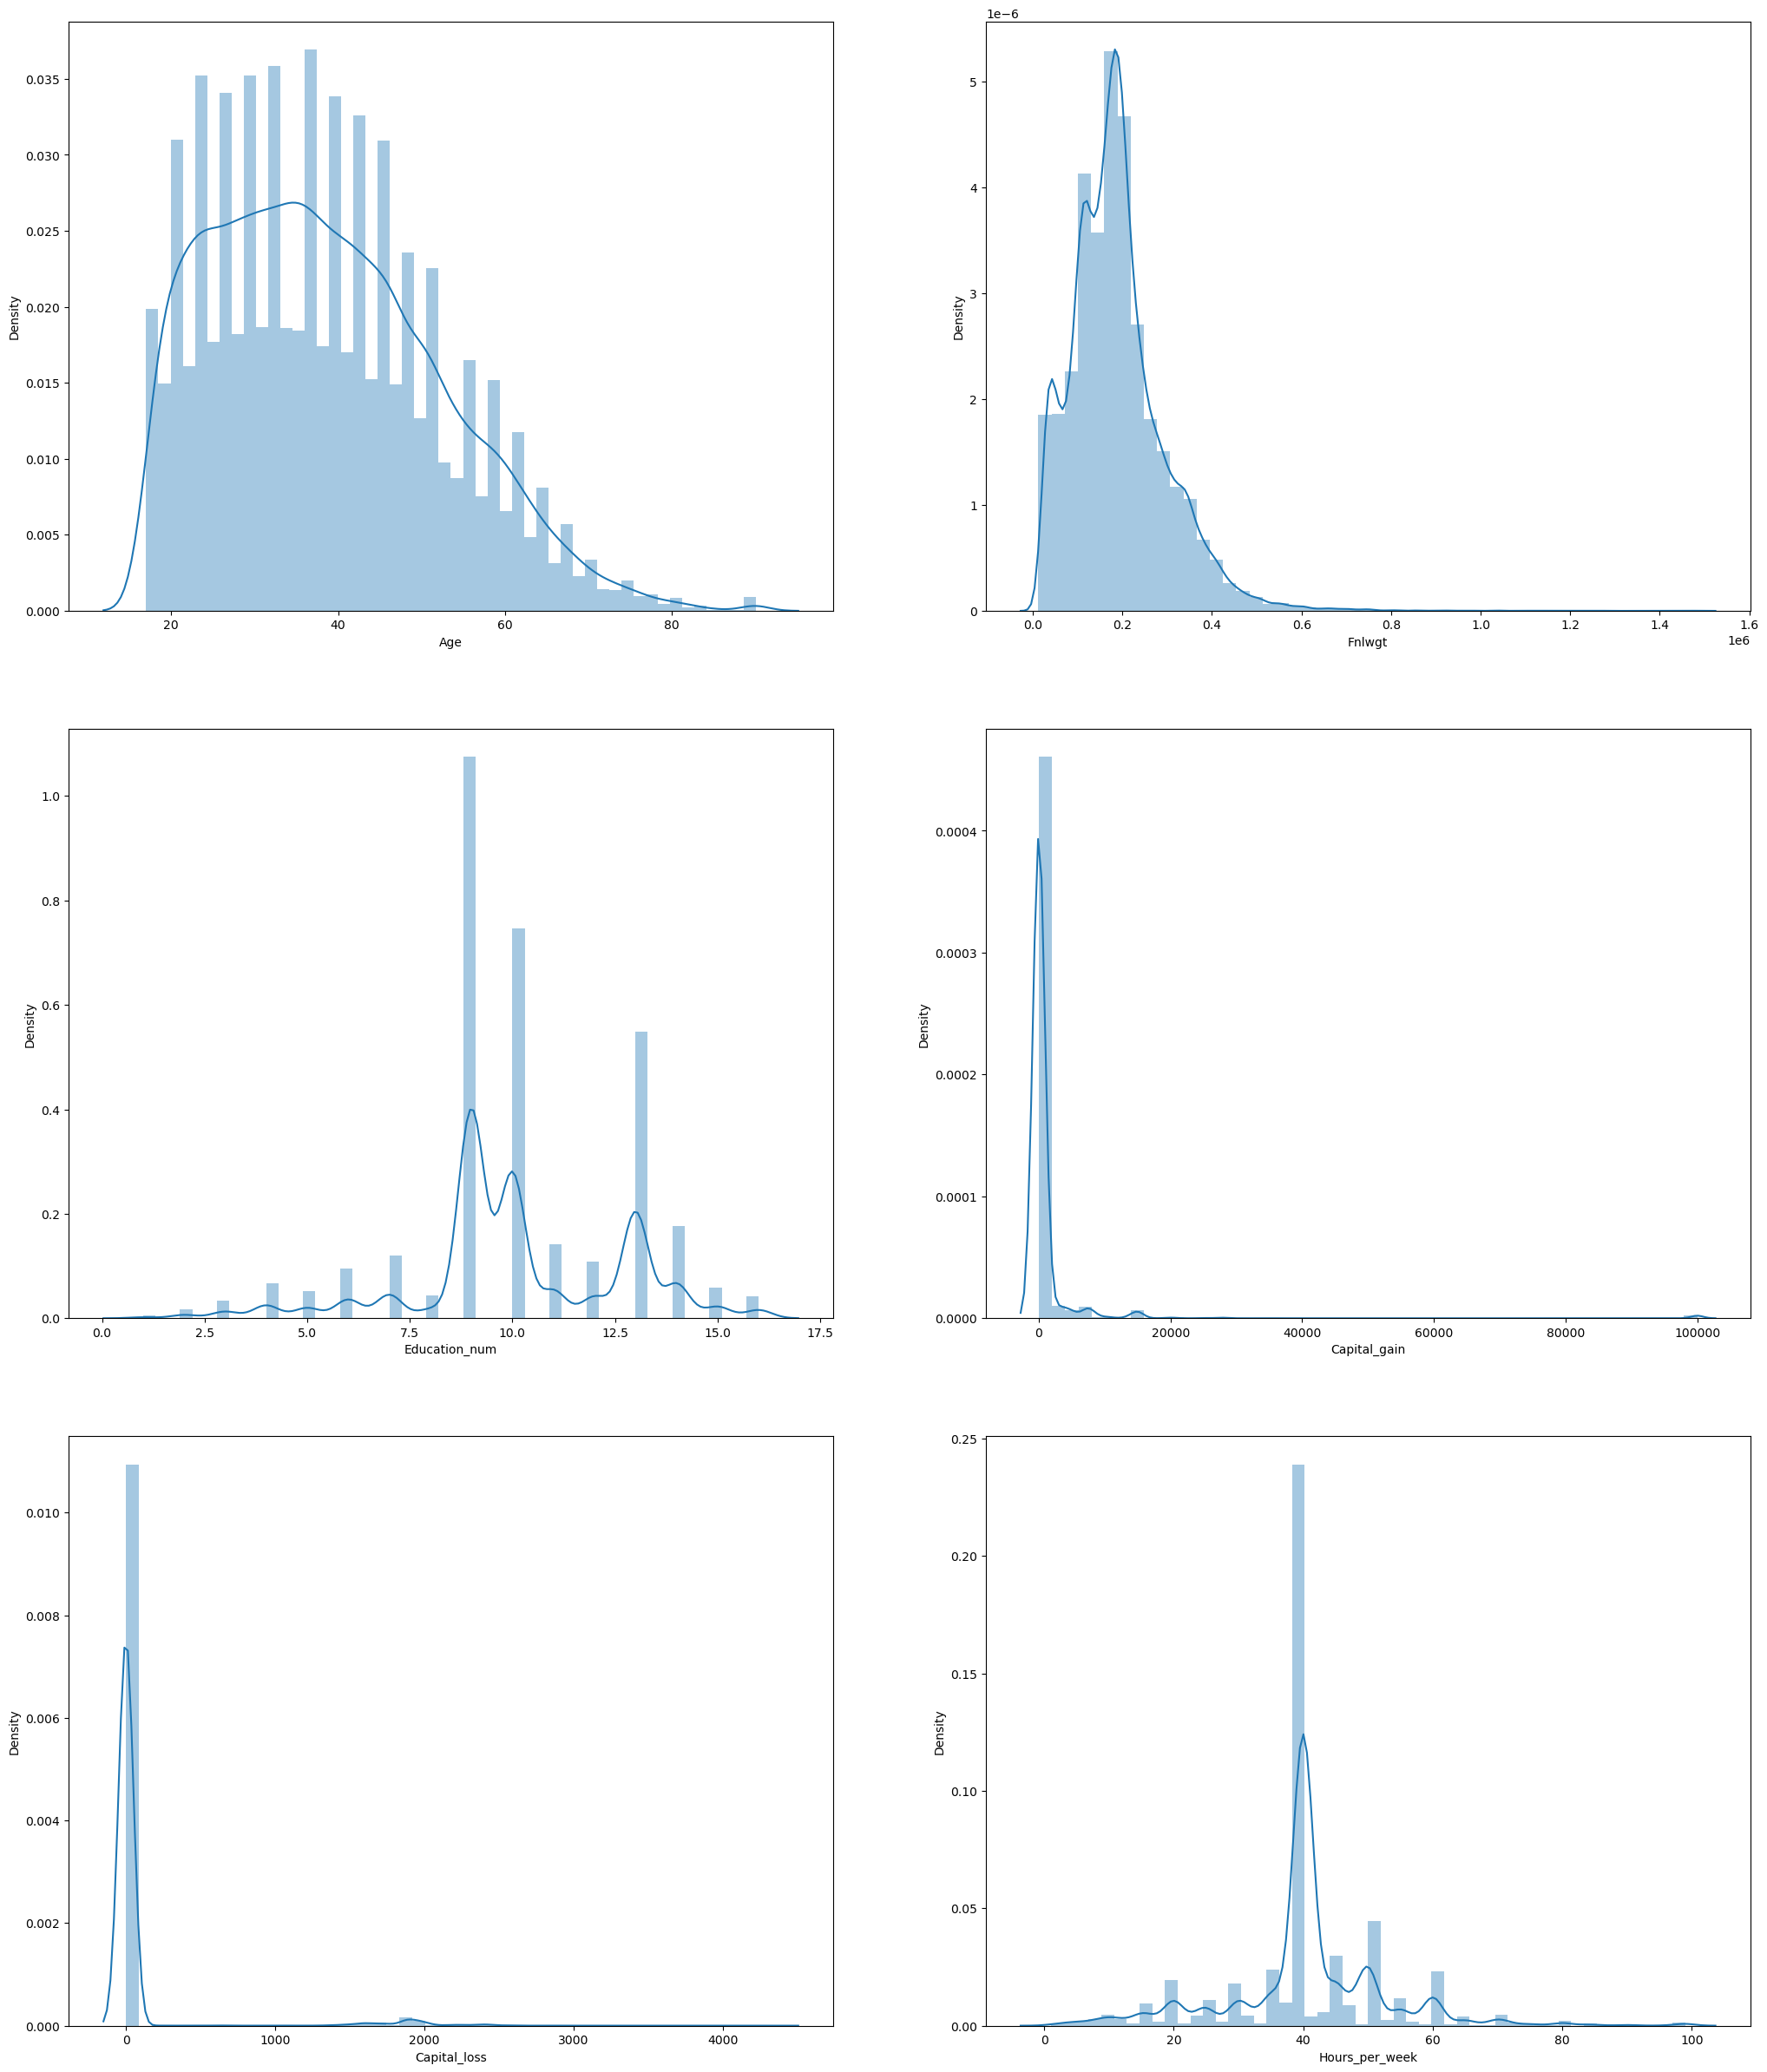

In [17]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Census.columns:
    if pd.api.types.is_numeric_dtype(Census[column]):
        if plotnumber<=16:
            ax = plt.subplot(3,2,plotnumber)
            sns.distplot(Census[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

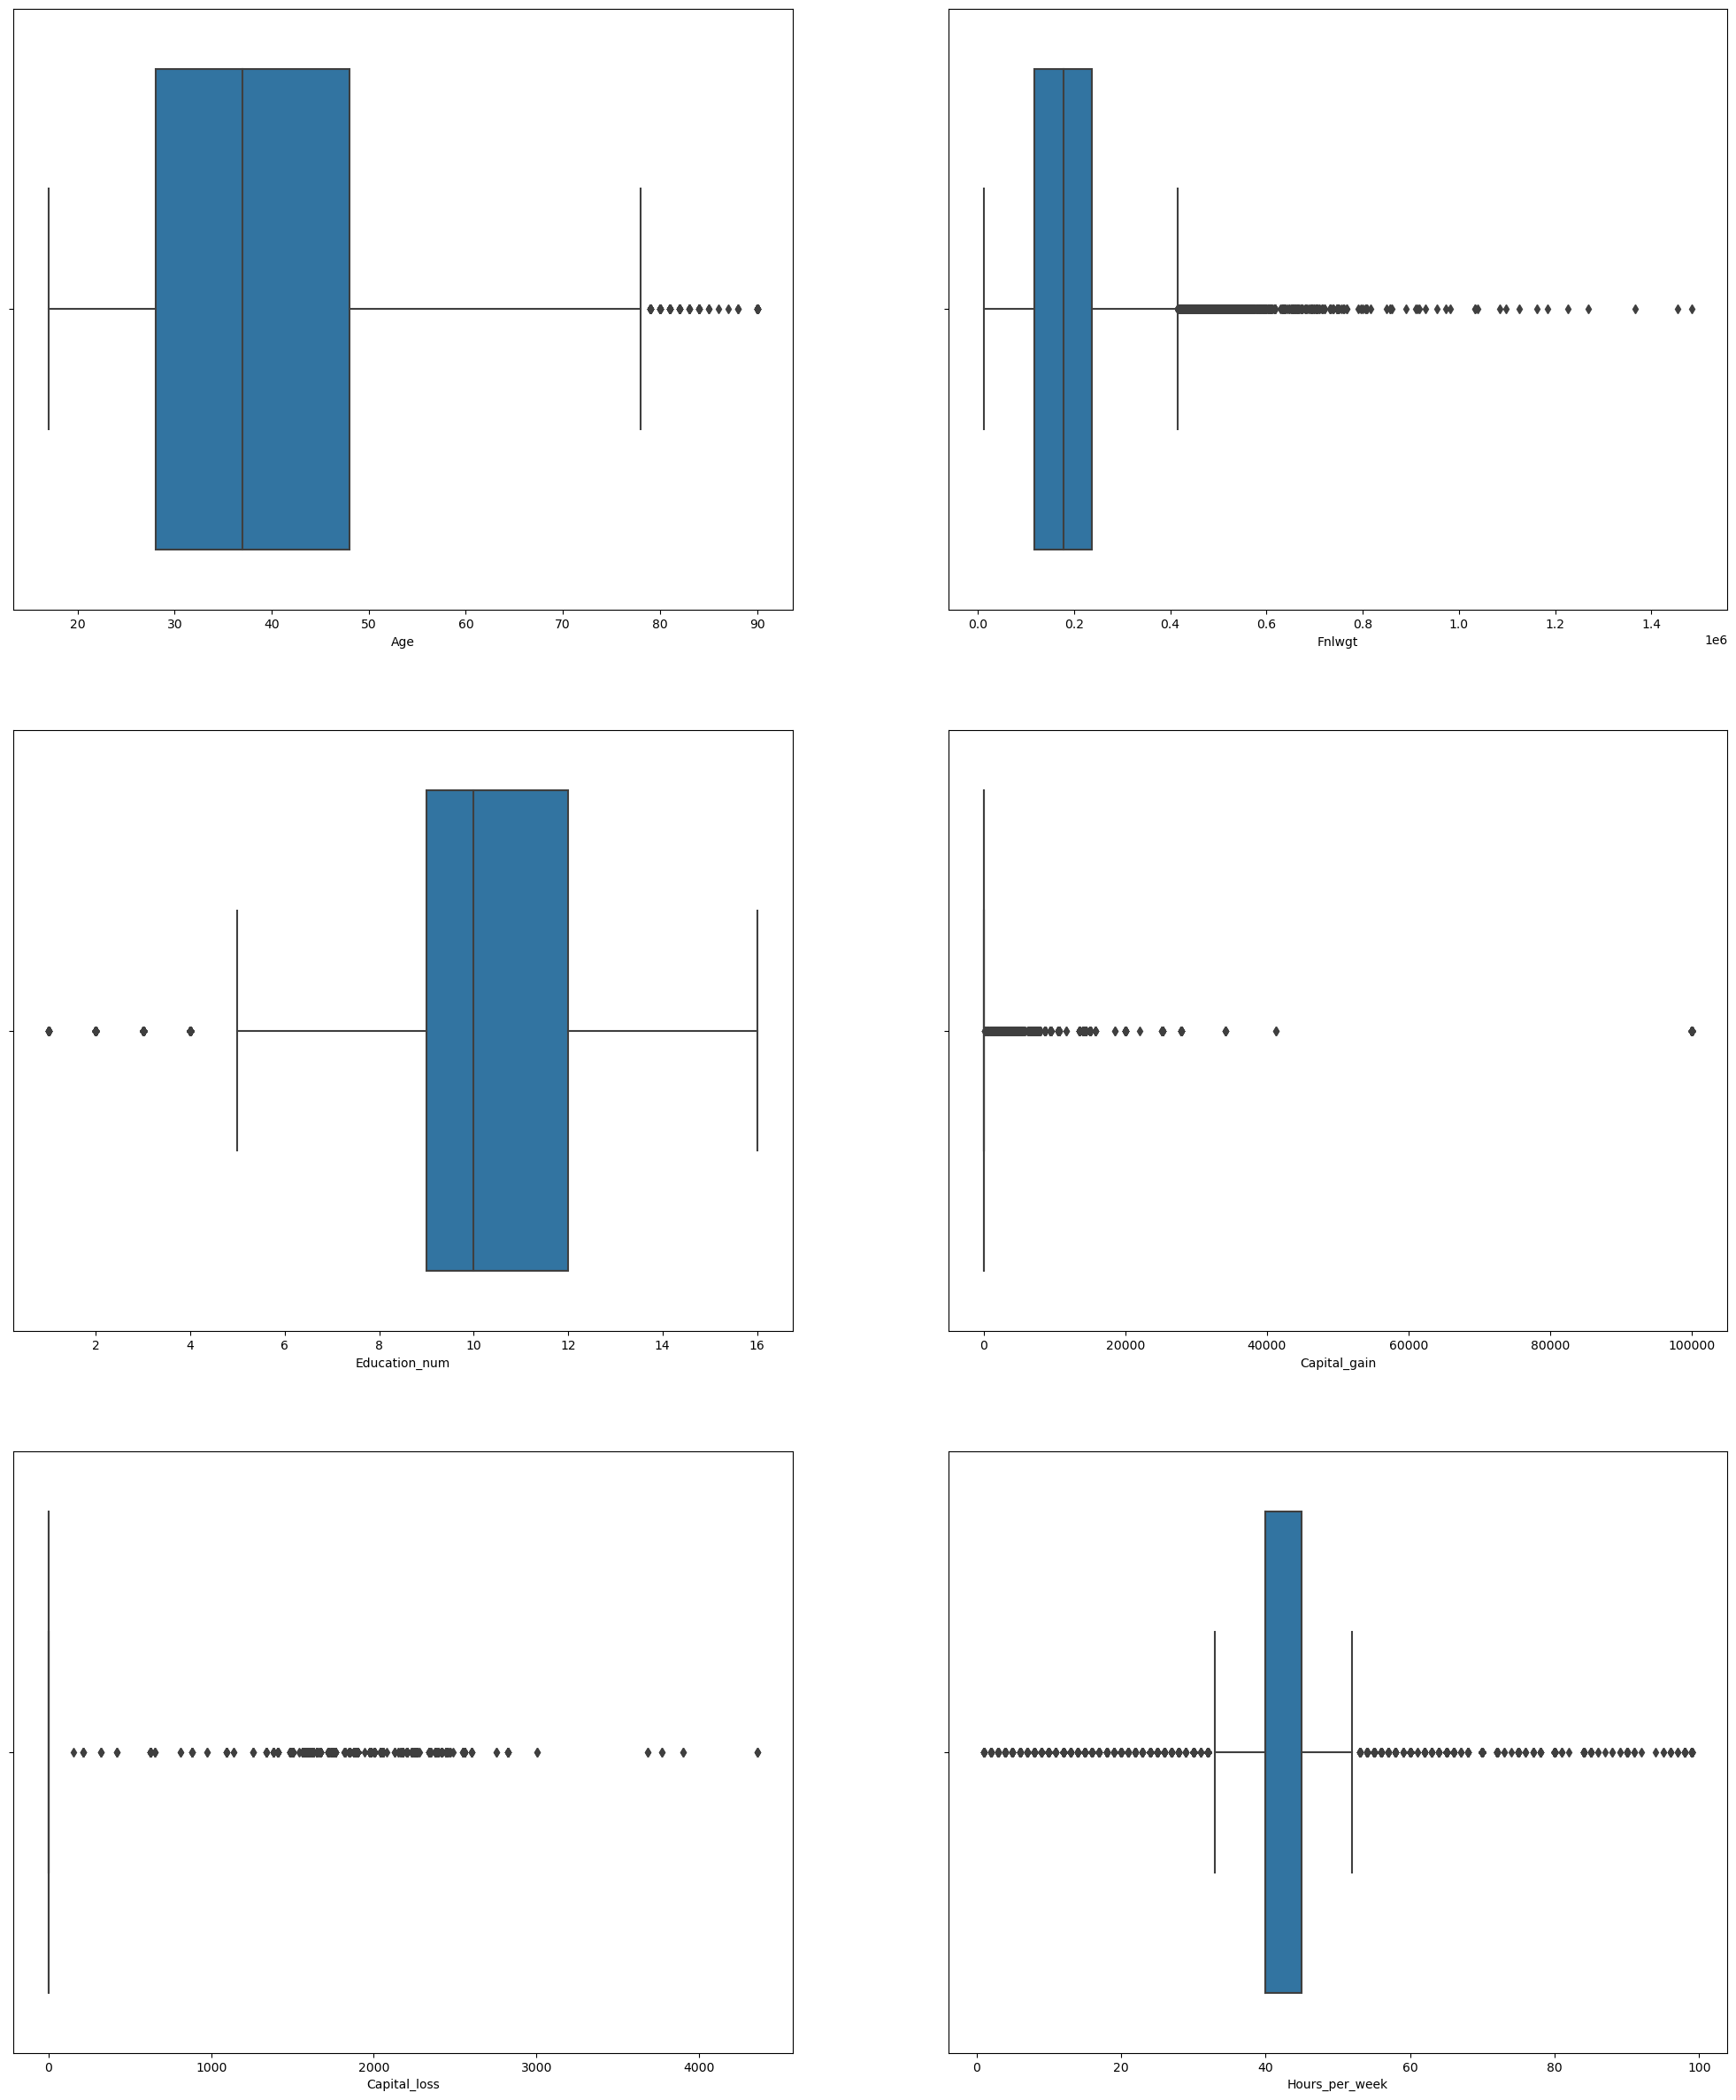

In [18]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Census.columns:
    if pd.api.types.is_numeric_dtype(Census[column]):
        if plotnumber<=16:
            ax = plt.subplot(3,2,plotnumber)
            sns.boxplot(Census[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

In [19]:
from scipy.stats import zscore
from scipy import stats

In [20]:
census = Census[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]

scores = np.abs(zscore(census))

In [21]:
Census2 =Census[(scores<3).all(axis=1)]
Census2.shape

(30028, 15)

In [22]:
print('Data Loss:',((Census.shape[0]-Census2.shape[0])/Census.shape[0])*100)

Data Loss: 7.776412776412776


In [23]:
Census2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [24]:
for column in Census2.columns:
    if pd.api.types.is_numeric_dtype(Census2[column]):
         Census2.skew()

In [25]:
Census2.skew()

Age                0.489206
Fnlwgt             0.633615
Education_num     -0.324321
Capital_gain       4.957931
Capital_loss      29.761341
Hours_per_week    -0.350891
dtype: float64

In [26]:
Census2['Fnlwgt']= np.cbrt(Census2['Fnlwgt'])
Census2['Capital_gain']= np.sqrt(Census2['Capital_gain'])
Census2['Capital_loss']= np.sqrt(Census2['Capital_loss'])

In [27]:
Census2.skew()

Age                0.489206
Fnlwgt            -0.376865
Education_num     -0.324321
Capital_gain       3.702653
Capital_loss      26.701614
Hours_per_week    -0.350891
dtype: float64

In [28]:
Census2['Capital_gain']= np.sqrt(Census2['Capital_gain'])
Census2['Capital_loss']= np.sqrt(Census2['Capital_loss'])

In [29]:
Census2.skew()

Age                0.489206
Fnlwgt            -0.376865
Education_num     -0.324321
Capital_gain       3.260275
Capital_loss      25.499353
Hours_per_week    -0.350891
dtype: float64

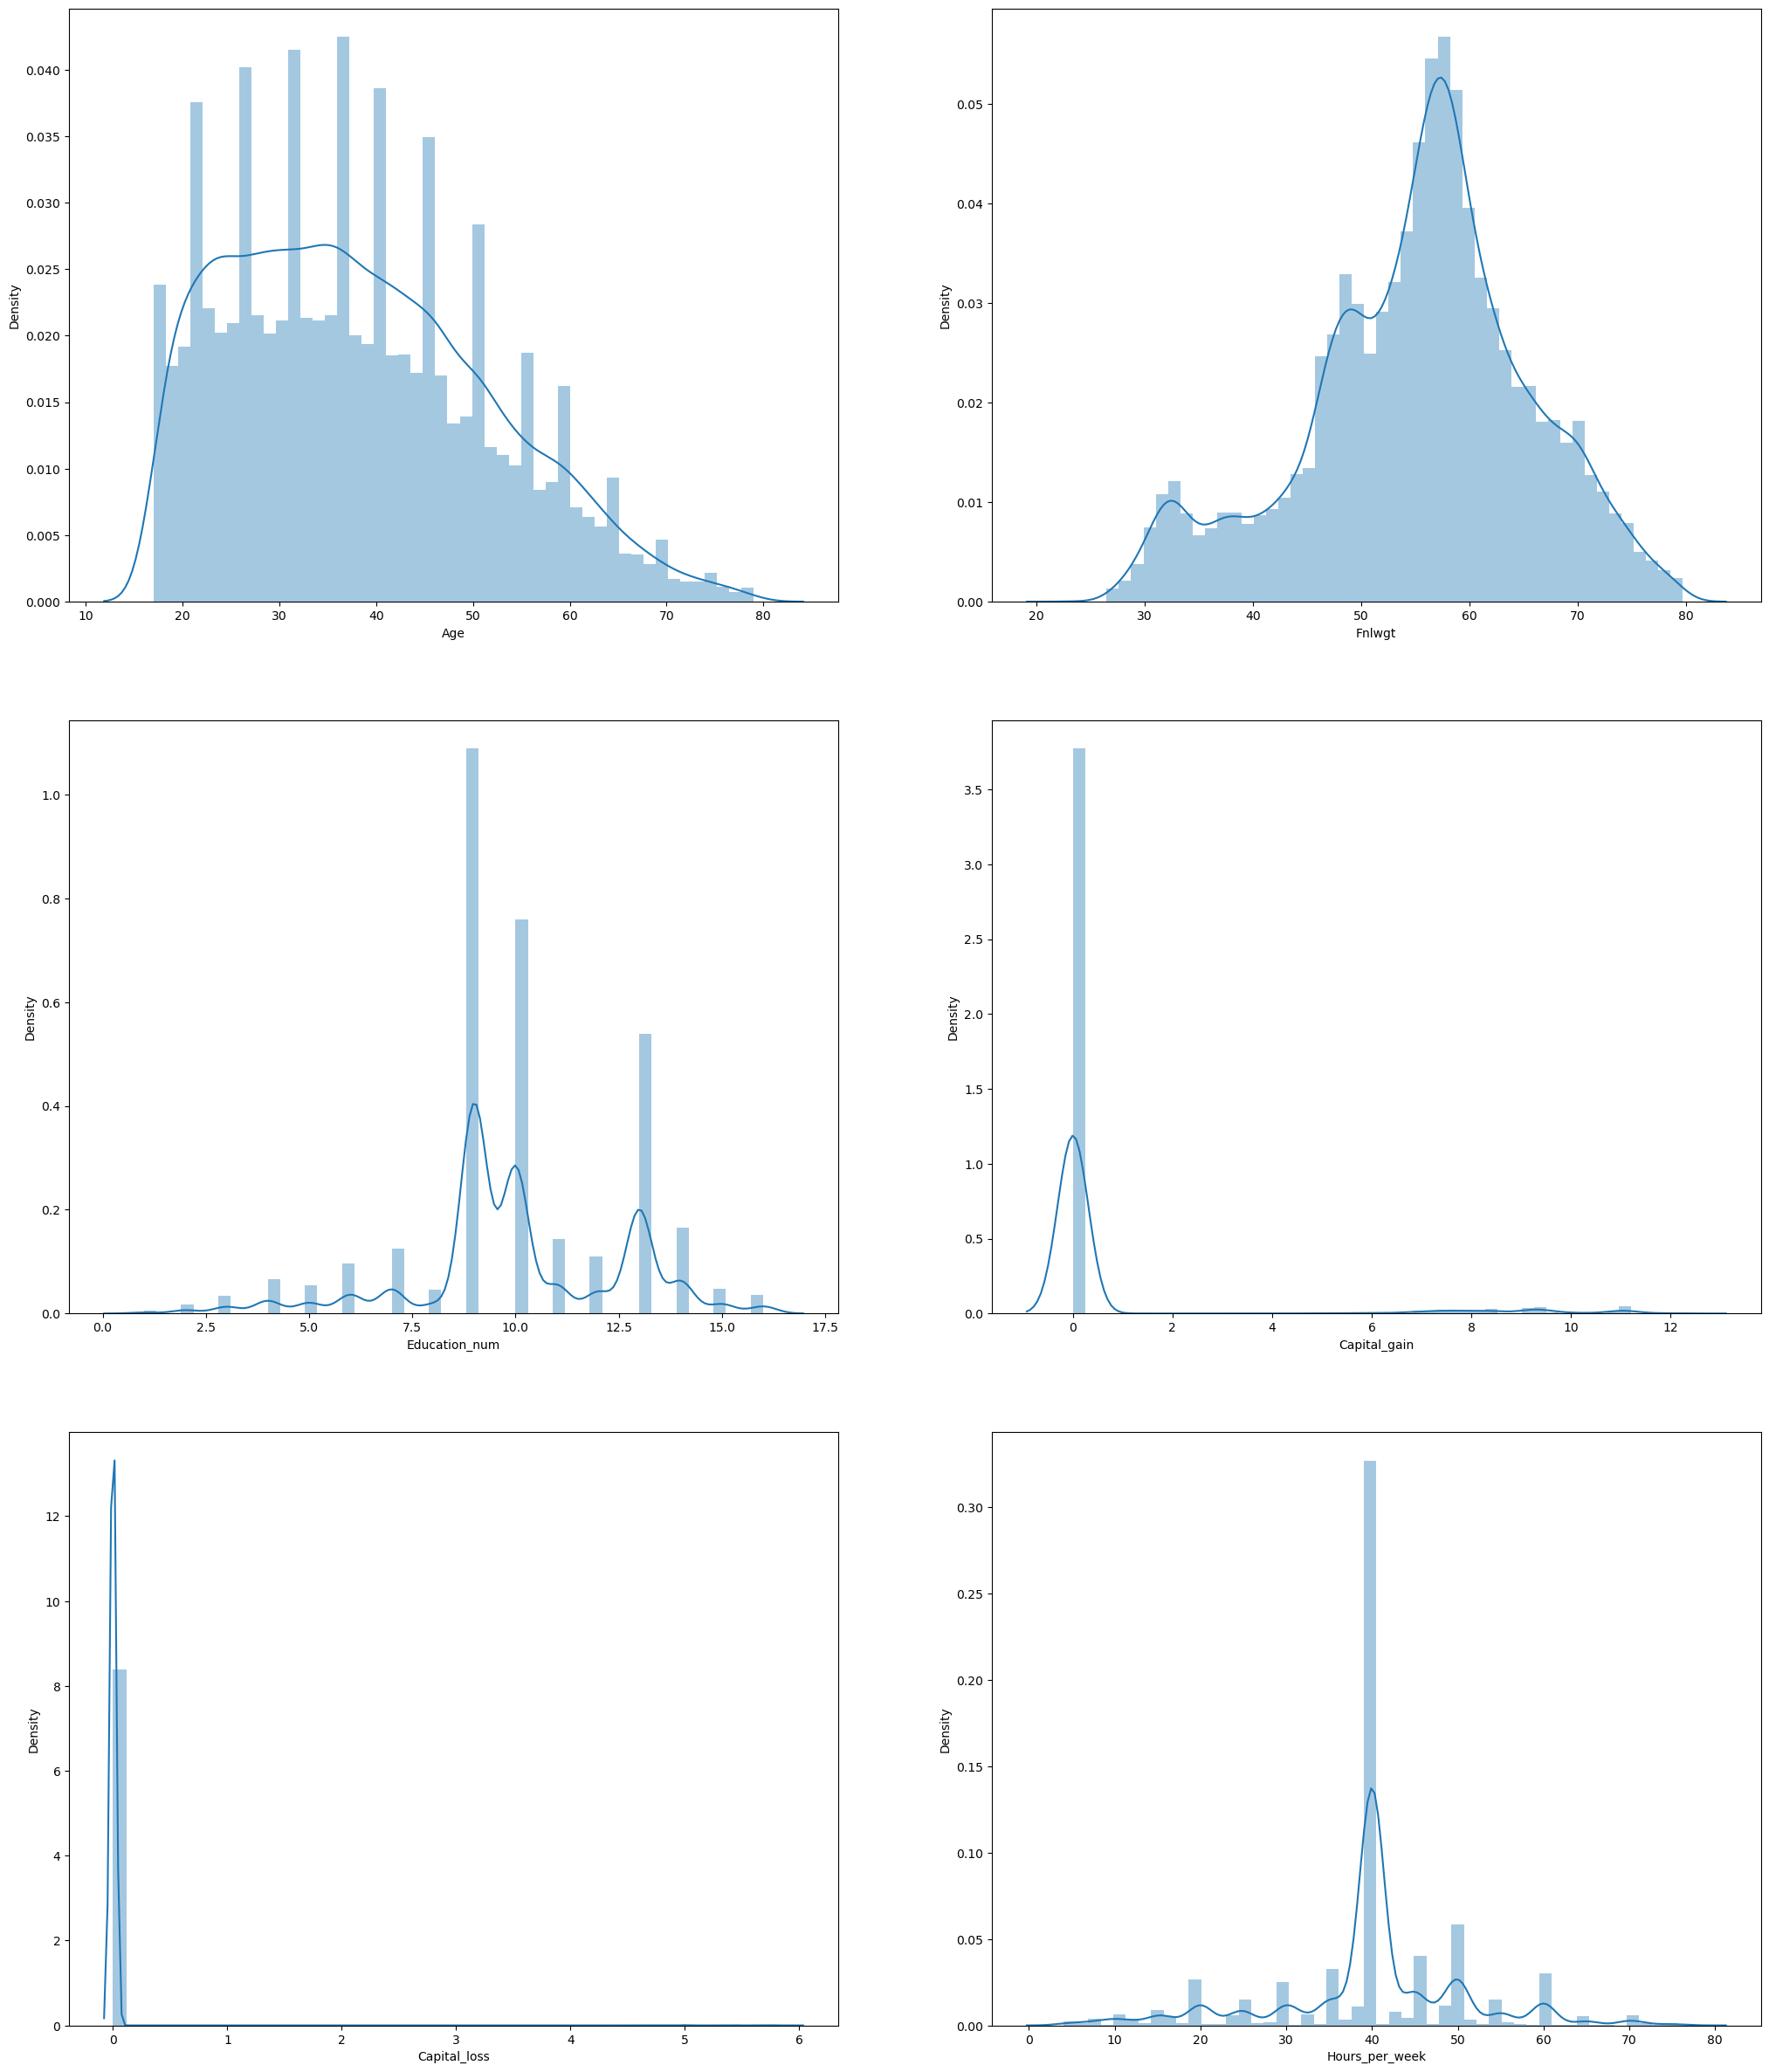

In [30]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Census2.columns:
    if pd.api.types.is_numeric_dtype(Census2[column]):
        if plotnumber<=6:
            ax = plt.subplot(3,2,plotnumber)
            sns.distplot(Census2[column])
            plt.xlabel(column,fontsize = 10)
        plotnumber+=1
plt.show()

In [31]:
Encode = OrdinalEncoder()

In [32]:
for i in Census2.columns:
    if Census2[i].dtypes =='object':
        Census2[i] = Encode.fit_transform(Census2[i].values.reshape(-1,1))
Census2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,43.675121,9.0,13,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13,38.0,0.0
1,38,4.0,59.967204,11.0,9,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40,38.0,0.0
2,53,4.0,61.685627,1.0,7,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40,38.0,0.0
3,28,4.0,69.686283,9.0,13,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40,5.0,0.0
4,37,4.0,65.776255,12.0,14,2.0,4.0,5.0,4.0,0.0,0.0,0.0,40,38.0,0.0


In [33]:
Census2['Income'].unique()

array([0., 1.])

In [34]:
Census2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30028 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             30028 non-null  int64  
 1   Workclass       30028 non-null  float64
 2   Fnlwgt          30028 non-null  float64
 3   Education       30028 non-null  float64
 4   Education_num   30028 non-null  int64  
 5   Marital_status  30028 non-null  float64
 6   Occupation      30028 non-null  float64
 7   Relationship    30028 non-null  float64
 8   Race            30028 non-null  float64
 9   Sex             30028 non-null  float64
 10  Capital_gain    30028 non-null  float64
 11  Capital_loss    30028 non-null  float64
 12  Hours_per_week  30028 non-null  int64  
 13  Native_country  30028 non-null  float64
 14  Income          30028 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 3.7 MB


In [35]:
Census2.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [36]:
correllation = Census2.corr()

In [37]:
correllation

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.006566,-0.063138,-0.012307,0.029319,-0.284030,-0.016427,-0.266150,0.025182,0.086214,0.127781,0.020120,0.089518,-0.001793,0.236579
Workclass,0.006566,1.000000,-0.014738,0.020502,0.049249,-0.058917,0.252408,-0.089523,0.046720,0.092448,0.017269,-0.006246,0.126712,-0.006423,0.042481
Fnlwgt,-0.063138,-0.014738,1.000000,-0.025150,-0.041745,0.027360,-0.000606,0.009375,-0.004922,0.024261,-0.002054,0.000206,-0.015706,-0.059959,-0.005291
Education,-0.012307,0.020502,-0.025150,1.000000,0.360410,-0.035853,-0.023661,-0.009153,0.015971,-0.030643,0.022189,-0.000823,0.056424,0.068020,0.074714
Education_num,0.029319,0.049249,-0.041745,0.360410,1.000000,-0.062141,0.105154,-0.090168,0.031629,0.006303,0.125584,0.009568,0.148738,0.056260,0.317044
Marital_status,-0.284030,-0.058917,0.027360,-0.035853,-0.062141,1.000000,-0.006721,0.185443,-0.066351,-0.124501,-0.069895,-0.016289,-0.195567,-0.023524,-0.194637
Occupation,-0.016427,0.252408,-0.000606,-0.023661,0.105154,-0.006721,1.000000,-0.073672,0.007292,0.080000,0.017862,0.000515,0.069247,-0.012539,0.069605
Relationship,-0.266150,-0.089523,0.009375,-0.009153,-0.090168,0.185443,-0.073672,1.000000,-0.116493,-0.576820,-0.089334,0.034792,-0.256778,-0.003525,-0.244848
Race,0.025182,0.046720,-0.004922,0.015971,0.031629,-0.066351,0.007292,-0.116493,1.000000,0.090040,0.025576,-0.000053,0.045703,0.134395,0.071960
Sex,0.086214,0.092448,0.024261,-0.030643,0.006303,-0.124501,0.080000,-0.576820,0.090040,1.000000,0.070124,-0.031493,0.234314,-0.009270,0.208901


I see no much relationship but checking further with more clarrification

In [38]:
correllation['Income'].sort_values(ascending= False)

Income            1.000000
Education_num     0.317044
Capital_gain      0.302042
Age               0.236579
Hours_per_week    0.230519
Sex               0.208901
Education         0.074714
Race              0.071960
Occupation        0.069605
Workclass         0.042481
Native_country    0.017340
Fnlwgt           -0.005291
Capital_loss     -0.017262
Marital_status   -0.194637
Relationship     -0.244848
Name: Income, dtype: float64

from heatmap above i see a negative and positive correlation of -6 and 0.4 respectively, that means there maybe case of multiculinearity but checking further and addressing it in following cells

In [39]:
Features = Census2.drop(columns = ['Income'])
Label = Census2['Income']

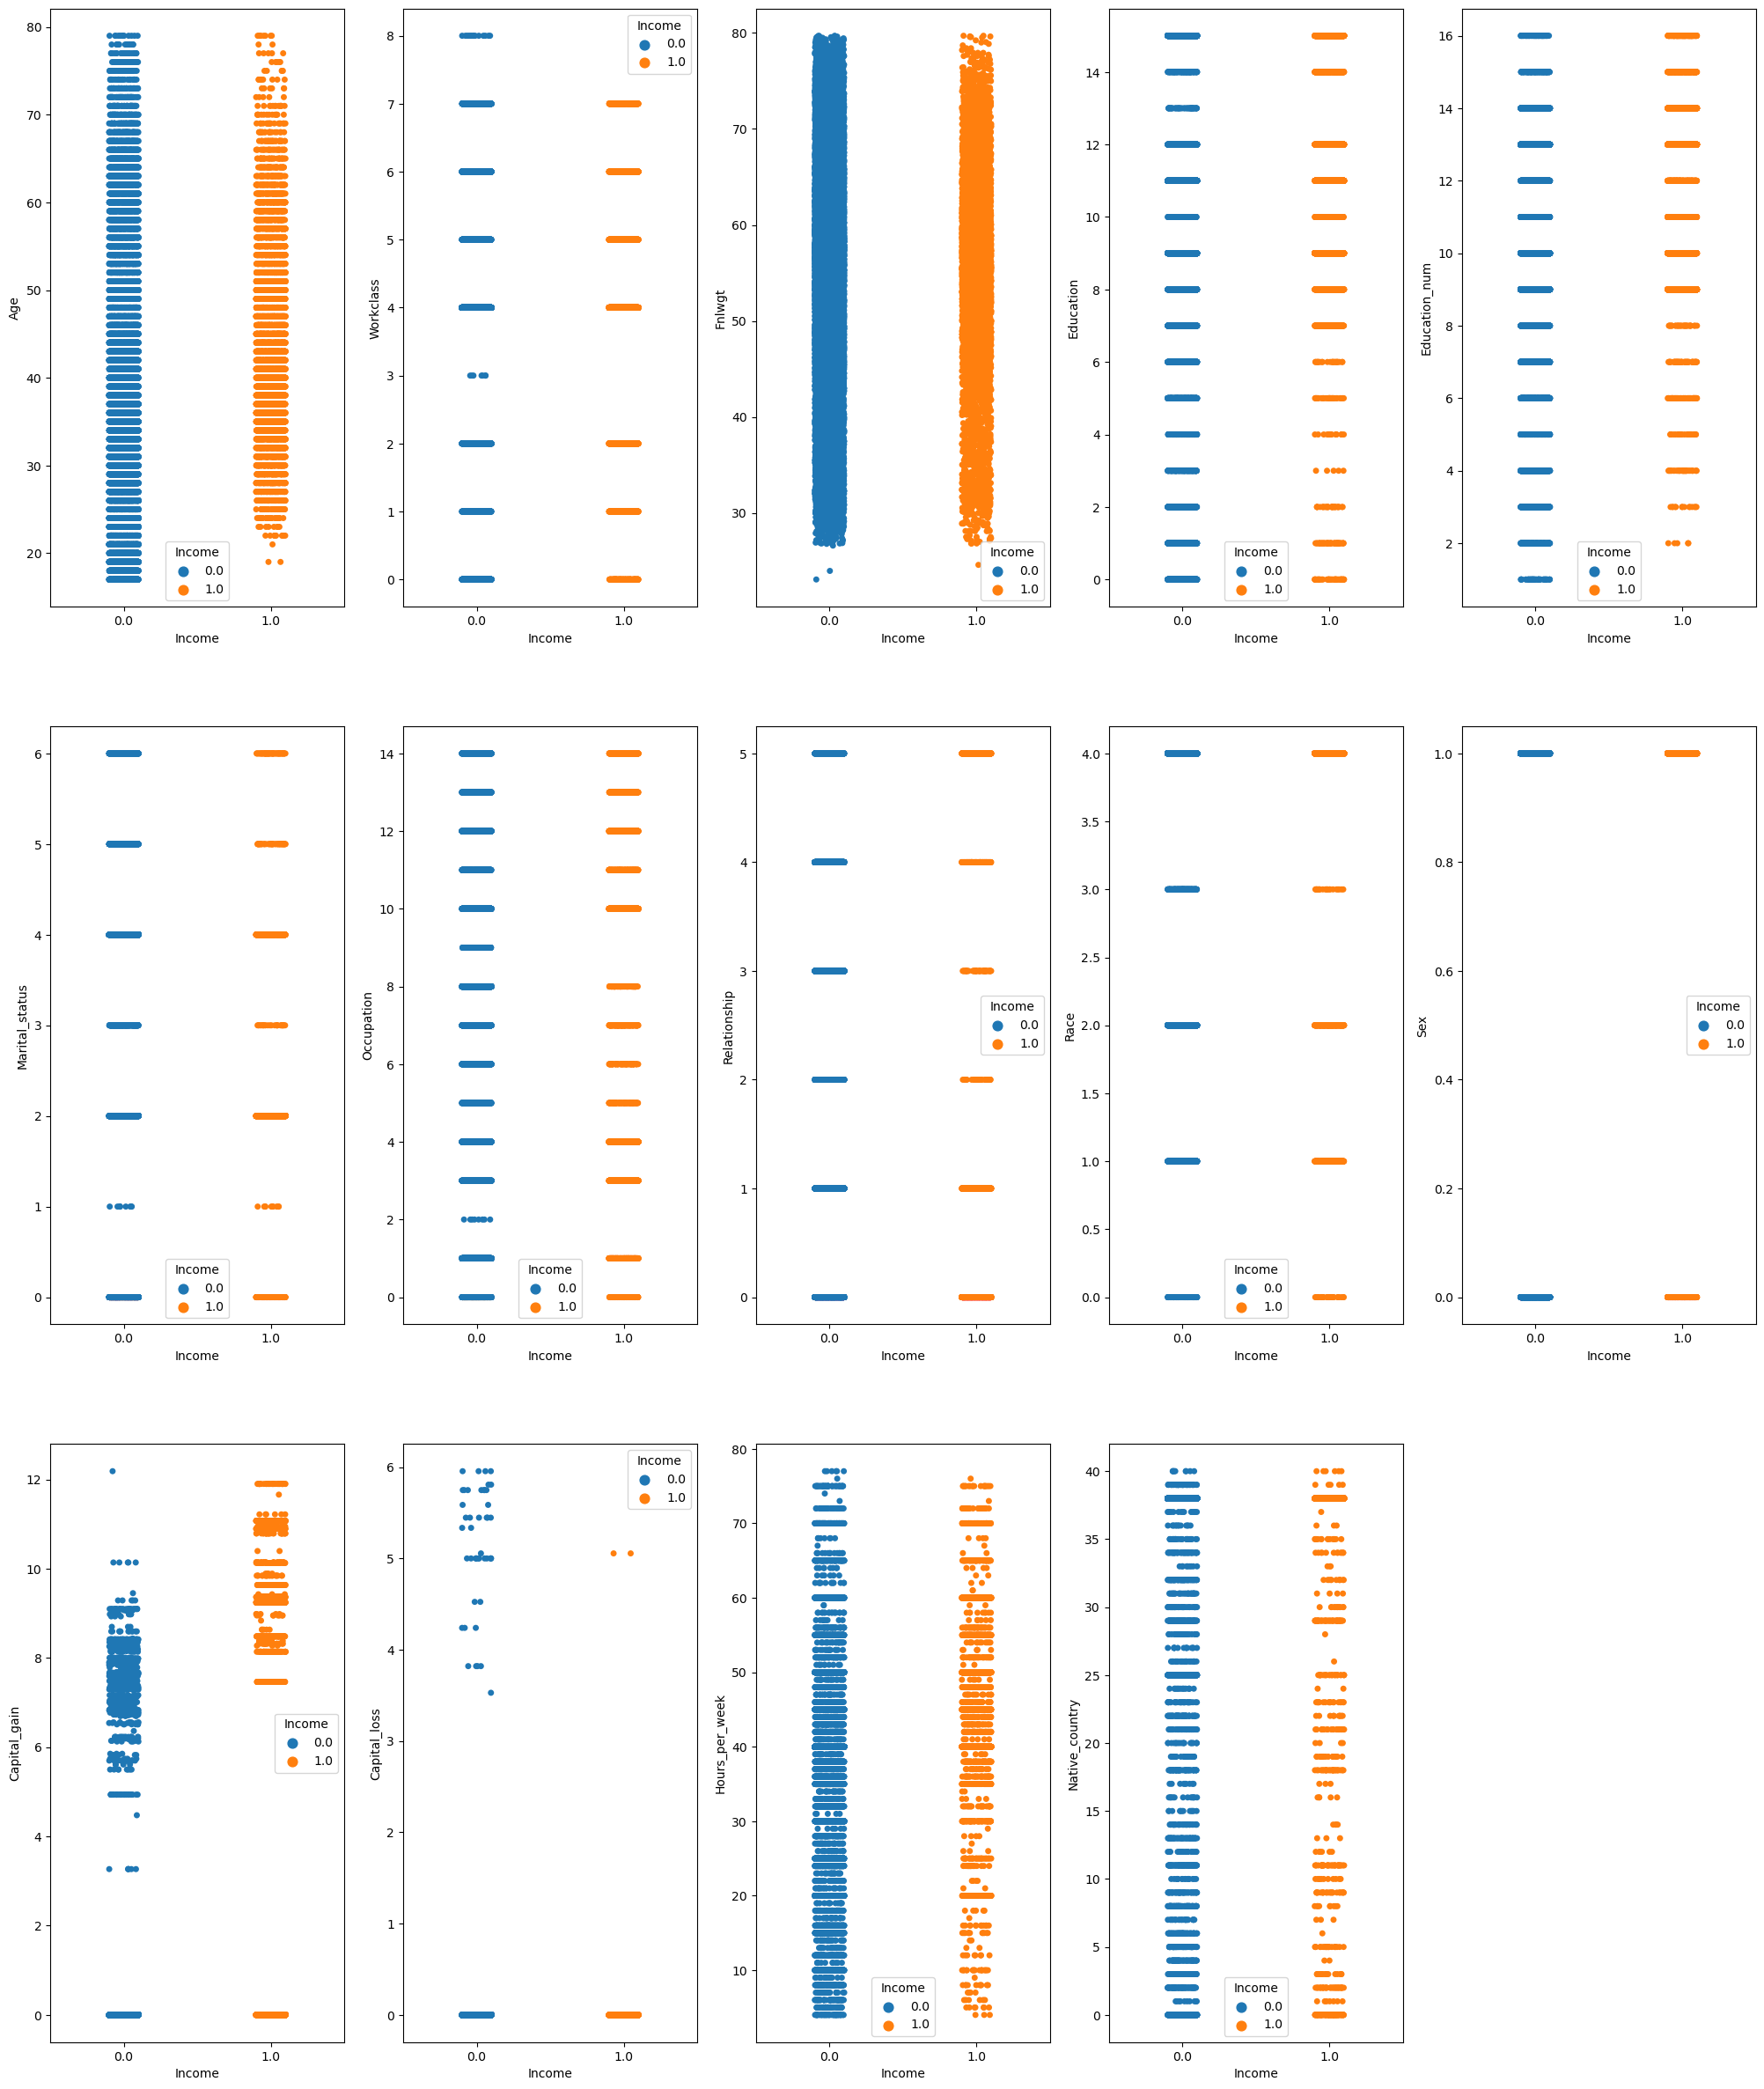

In [40]:
plt.figure(figsize=(25,30))
plotnumber = 1
for column in Features:
    if plotnumber<=14:
        ax = plt.subplot(3,5,plotnumber)
        sns.stripplot(x=Label,y=Features[column],hue = Label)
        plotnumber+=1

plt.show()

from above i see that there is multi-culinerity i will stabdardise the and check the vif

In [41]:
scaler = StandardScaler()
Features = pd.DataFrame(scaler.fit_transform(Features),columns = Features.columns)
Features

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.883097,1.476965,-1.104337,-0.329704,1.173719,-0.412219,-0.603785,-0.918763,0.394659,0.715637,-0.291008,-0.039696,-2.411906,0.293085
1,-0.013956,0.094323,0.460372,0.183720,-0.402931,-1.732903,-0.130788,-0.297202,0.394659,0.715637,-0.291008,-0.039696,0.010616,0.293085
2,1.107361,0.094323,0.625411,-2.383401,-1.191256,-0.412219,-0.130788,-0.918763,-1.953203,0.715637,-0.291008,-0.039696,0.010616,0.293085
3,-0.761501,0.094323,1.393802,-0.329704,1.173719,-0.412219,0.815206,2.189042,-1.953203,-1.397357,-0.291008,-0.039696,0.010616,-4.051216
4,-0.088711,0.094323,1.018279,0.440432,1.567881,-0.412219,-0.603785,2.189042,0.394659,-1.397357,-0.291008,-0.039696,0.010616,0.293085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30023,-0.836255,0.094323,0.809606,-0.843129,0.779556,-0.412219,1.524702,2.189042,0.394659,-1.397357,-0.291008,-0.039696,-0.168830,0.293085
30024,0.135553,0.094323,-0.146873,0.183720,-0.402931,-0.412219,0.105711,-0.918763,0.394659,0.715637,-0.291008,-0.039696,0.010616,0.293085
30025,1.481133,0.094323,-0.174431,0.183720,-0.402931,2.229149,-1.313280,1.567481,0.394659,-1.397357,-0.291008,-0.039696,0.010616,0.293085
30026,-1.210027,0.094323,0.331486,0.183720,-0.402931,0.908465,-1.313280,0.945920,0.394659,0.715637,-0.291008,-0.039696,-1.783845,0.293085


In [42]:
vif = pd.DataFrame()
vif['vif values']= [variance_inflation_factor(Features.values, i) for i in range(len(Features.columns))]
vif['features'] = Features.columns

In [43]:
vif

,vif values,features
0,1.176673,Age
1,1.088764,Workclass
2,1.010541,Fnlwgt
3,1.160951,Education
4,1.213704,Education_num
5,1.137562,Marital_status
6,1.088829,Occupation
7,1.671778,Relationship
8,1.037252,Race
9,1.547743,Sex


the variance values are in my acceptable range of below 10
before model building now i want to check for the data balance and if not balance i will use smote method in balancing the data

In [44]:
print(Census2['Income'].value_counts())

0.0    23369
1.0     6659
Name: Income, dtype: int64


In [45]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
Features1,Label1 = SM.fit_resample(Features,Label)

In [46]:
Label1.value_counts()

0.0    23369
1.0    23369
Name: Income, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [48]:
MaxAccu = 0
MaxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(Features1,Label1,test_size = .30, random_state = i)
    gbc = GradientBoostingClassifier()
    gbc.fit(x_train,y_train)
    pred = gbc.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print('maximum r2 score is =',MaxAccu,'\n random state = ',MaxRS)

maximum r2 score is = 0.8747682213664242 
 random state =  42


In [49]:
x_train,x_test,y_train,y_test = train_test_split(Features1,Label1, test_size = 0.30, random_state = MaxRS)

In [50]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
pred_train = rfc.predict(x_train)
print ('accuracy score:', accuracy_score(y_test,pred_rfc))
print ('confusion matrix:', confusion_matrix(y_test,pred_rfc))
print ('classification report:', classification_report(y_test,pred_rfc))

accuracy score: 0.9035087719298246
confusion matrix: [[6274  785]
 [ 568 6395]]
classification report:               precision    recall  f1-score   support

         0.0       0.92      0.89      0.90      7059
         1.0       0.89      0.92      0.90      6963

    accuracy                           0.90     14022
   macro avg       0.90      0.90      0.90     14022
weighted avg       0.90      0.90      0.90     14022



In [51]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc = gbc.predict(x_test)
pred_train = gbc.predict(x_train)
print ('accuracy score:', accuracy_score(y_test,pred_gbc))
print ('confusion matrix:', confusion_matrix(y_test,pred_gbc))
print ('classification report:', classification_report(y_test,pred_gbc))

accuracy score: 0.8747682213664242
confusion matrix: [[5984 1075]
 [ 681 6282]]
classification report:               precision    recall  f1-score   support

         0.0       0.90      0.85      0.87      7059
         1.0       0.85      0.90      0.88      6963

    accuracy                           0.87     14022
   macro avg       0.88      0.87      0.87     14022
weighted avg       0.88      0.87      0.87     14022



In [52]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc = bc.predict(x_test)
pred_train = bc.predict(x_train)
print ('accuracy score:', accuracy_score(y_test,pred_bc))
print ('confusion matrix:', confusion_matrix(y_test,pred_bc))
print ('classification report:', classification_report(y_test,pred_bc))

accuracy score: 0.8898160034231921
confusion matrix: [[6336  723]
 [ 822 6141]]
classification report:               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      7059
         1.0       0.89      0.88      0.89      6963

    accuracy                           0.89     14022
   macro avg       0.89      0.89      0.89     14022
weighted avg       0.89      0.89      0.89     14022



In [54]:
from sklearn.model_selection import cross_val_score


In [55]:
score1 = cross_val_score(rfc,Features1,Label1,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference =',(accuracy_score(y_test,pred_rfc)-score1.mean()))

[0.32734275 0.56867779 0.72314934 0.73467422 0.72097999]
0.614964818056844
difference = 0.2885439538729806


In [56]:
score2 = cross_val_score(gbc,Features1,Label1,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('difference =',(accuracy_score(y_test,pred_gbc)-score2.mean()))

[0.25845101 0.44929397 0.52717159 0.54466673 0.51171498]
0.4582596551296924
difference = 0.41650856623673177


In [57]:
score3 = cross_val_score(bc,Features1,Label1,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('difference =',(accuracy_score(y_test,pred_bc)-score3.mean()))

[0.16902011 0.49593496 0.67907574 0.68974002 0.68503263]
0.5437606911800701
difference = 0.346055312243122


rfc is my best model because it has smallest diiference of accuracy score

In [58]:
from sklearn.model_selection import GridSearchCV
params_grid = {'n_estimators':[20,56,70,15,90],
             'criterion': [ 'gini', 'entropy','log_loss'],
             'max_features':[2,50,70,4,200,250],
              'bootstrap':[True,False]
             }
grid_search =GridSearchCV(estimator=rfc, param_grid = params_grid, cv = 5)


In [59]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [2, 50, 70, 4, 200, 250],
                         'n_estimators': [20, 56, 70, 15, 90]})

In [60]:
my_best_parameter = grid_search.best_params_
print(my_best_parameter)

{'bootstrap': False, 'criterion': 'entropy', 'max_features': 2, 'n_estimators': 56}


In [61]:
final_model = RandomForestClassifier(bootstrap= False, criterion= 'gini', min_samples_leaf= 1,n_estimators=90)

In [62]:
final_model

RandomForestClassifier(bootstrap=False, n_estimators=90)

In [63]:
final_model.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
pred_train = rfc.predict(x_train)
print ('accuracy score:', accuracy_score(y_test,pred_rfc))
print ('confusion matrix:', confusion_matrix(y_test,pred_rfc))
print ('classification report:', classification_report(y_test,pred_rfc))

accuracy score: 0.9035087719298246
confusion matrix: [[6274  785]
 [ 568 6395]]
classification report:               precision    recall  f1-score   support

         0.0       0.92      0.89      0.90      7059
         1.0       0.89      0.92      0.90      6963

    accuracy                           0.90     14022
   macro avg       0.90      0.90      0.90     14022
weighted avg       0.90      0.90      0.90     14022



In [64]:
from sklearn import metrics

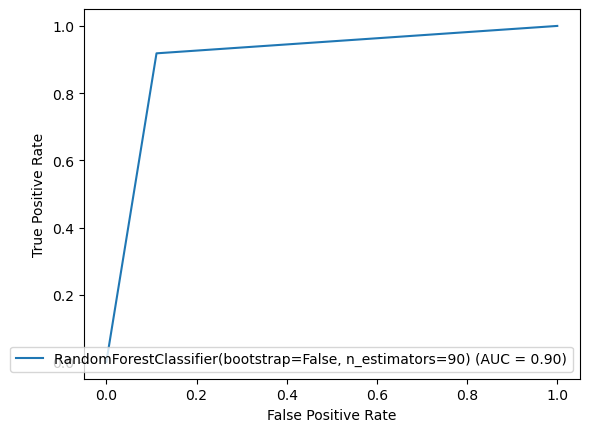

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_rfc)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = final_model)
display.plot()

In [66]:
import joblib
import pickle
filename = 'Census.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [67]:
import pickle
loaded_final_model=pickle.load(open(filename,'rb'))
result = loaded_final_model.score(x_test,y_test)
print(result*100)

90.265297389816
